# Optional Lab: Cost Function for Logistic Regression

## Goals
In this lab, you will:
- examine the implementation and utilize the cost function for logistic regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors,  flat the arrays
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

## Dataset 
Let's start with the same dataset as was used in the decision boundary lab.

In [17]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])      

We will use a helper function to plot this data. The data points with label $y=1$ are shown as red crosses, while the data points with label $y=0$ are shown as blue circles.

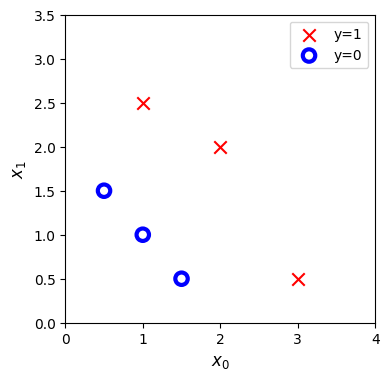

In [6]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$


<a name='ex-02'></a>
#### Code Description

The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example summing.

Note that the variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.

In [33]:
def sigmod(x):
    """
        
    """
    return 1/(1+np.exp(-x))

a = np.array([1,2,3]) # shape is (3, )
print(a.shape)
b = np.array([1,2,3]).reshape(-1,1) #  3 行 1 列
print(a)
print(b.shape)
print(a*b + 1)
# 举证乘法
print(np.dot(a, b) + 1)
print(a@b + 1)


(3,)
[1 2 3]
(3, 1)
[[ 2  3  4]
 [ 3  5  7]
 [ 4  7 10]]
[15]
[15]


In [27]:
def compute_cost_logistic(X, y, w, b):
    """
    Compute cost

    Args:
        X (ndarray (m, n)): Data, m examples with n features 
        y (ndarray (m,))  : Labels, m examples
        w (ndarray (n,))  : model parameters
        b (scalar)        : model parameter
    Returns:
        cost (scalar)     : cost for logistic regression
    """
    m = X.shape[0]
    # w = w.reshape(-1,1) # 变成 n 行 1 列
    cost = 0.0
    for i in range(m):
        z_i = X[i]@w + b
        f_wb_i = sigmod(z_i)
        cost += (-y[i]*np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i))
    cost = cost / m
    return cost

In [34]:
## calculate cost
n = X_train.shape[1]
w_tmp = np.array([1,1])
b_tmp = -3
cost = compute_cost_logistic(X_train, y_train, w_tmp, b_tmp)
print(cost)

0.36686678640551745


## Example
Now, let's see what the cost function output is for a different value of $w$. 

* In a previous lab, you plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `w = np.array([-3,1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `w = np.array([-4,1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

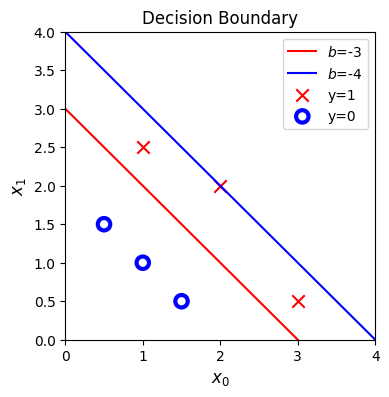

In [35]:
import matplotlib.pyplot as plt

# Choose values between -0 and 6
x0 = np.arange(0, 6)

# Plot the two decision boundaries
x1 = 3 - x0
x_other = 4 - x0

fig,ax = plt.subplots(1,1,figsize=(4,4))
# Plot the decision boundary
ax.plot(x0, x1, 'r', label='$b$=-3')
ax.plot(x0, x_other, 'blue', label='$b$=-4')
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train, y_train, ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

You can see from this plot that `w = np.array([-4,1,1])` is a worse model for the training data. Let's see if the cost function implementation reflects this.

In [36]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


**Expected output**

Cost for b = -3 :  0.3668667864055175

Cost for b = -4 :  0.5036808636748461


You can see the cost function behaves as expected and the cost for `w = np.array([-4,1,1])` is indeed higher than the cost for `w = np.array([-3,1,1])`

## Congratulations!
In this lab you examined and utilized the cost function for logistic regression.

In [31]:
# plot a cost function 
wx, by = np.meshgrid(np.linspace(-6, 12, 5), np.linspace(0, -20, 5))
# 创建二维 x, y 轴相应的坐标点，如下图所示,
# wx 为创建的所有点的x坐标
# by 为创建的所有点的y坐标
print("wx = ")
print(wx)
print("by = ")
print(by)

wx = 
[[-6.  -1.5  3.   7.5 12. ]
 [-6.  -1.5  3.   7.5 12. ]
 [-6.  -1.5  3.   7.5 12. ]
 [-6.  -1.5  3.   7.5 12. ]
 [-6.  -1.5  3.   7.5 12. ]]
by = 
[[  0.   0.   0.   0.   0.]
 [ -5.  -5.  -5.  -5.  -5.]
 [-10. -10. -10. -10. -10.]
 [-15. -15. -15. -15. -15.]
 [-20. -20. -20. -20. -20.]]


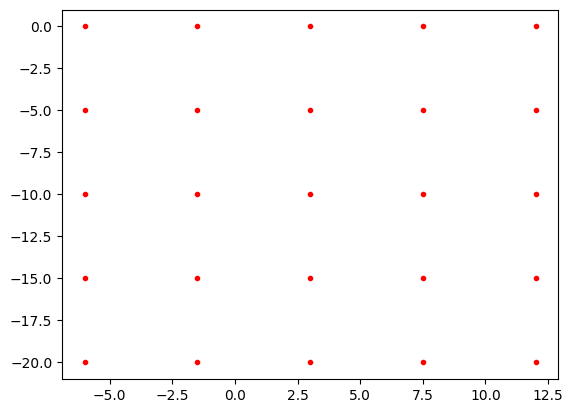

In [32]:
plt.plot(wx, by, marker='.', color='red', linestyle='none')
plt.show()

In [36]:
print("wx.ravel() = ", wx.ravel())
print("wx.ravel() = ", by.ravel())
points = np.c_[wx.ravel(), by.ravel()]
print(points)
print(points.shape)


wx.ravel() =  [-6.  -1.5  3.   7.5 12.  -6.  -1.5  3.   7.5 12.  -6.  -1.5  3.   7.5
 12.  -6.  -1.5  3.   7.5 12.  -6.  -1.5  3.   7.5 12. ]
wx.ravel() =  [  0.   0.   0.   0.   0.  -5.  -5.  -5.  -5.  -5. -10. -10. -10. -10.
 -10. -15. -15. -15. -15. -15. -20. -20. -20. -20. -20.]
[[ -6.    0. ]
 [ -1.5   0. ]
 [  3.    0. ]
 [  7.5   0. ]
 [ 12.    0. ]
 [ -6.   -5. ]
 [ -1.5  -5. ]
 [  3.   -5. ]
 [  7.5  -5. ]
 [ 12.   -5. ]
 [ -6.  -10. ]
 [ -1.5 -10. ]
 [  3.  -10. ]
 [  7.5 -10. ]
 [ 12.  -10. ]
 [ -6.  -15. ]
 [ -1.5 -15. ]
 [  3.  -15. ]
 [  7.5 -15. ]
 [ 12.  -15. ]
 [ -6.  -20. ]
 [ -1.5 -20. ]
 [  3.  -20. ]
 [  7.5 -20. ]
 [ 12.  -20. ]]
(25, 2)


In [27]:
a = np.array([[1,2,3], [1, 2, 3]])
a.shape
np.c_[np.array([[1,2,3], [1, 2, 3]]), np.array([4,5])]
# np.c_[np.array([[1, 1],[2, 2],[3, 3]]), np.array([[4, 1],[5, 1],[6, 1]])]

array([[1, 2, 3, 4],
       [1, 2, 3, 5]])